In [28]:
import secrets
import string
import random
import math
import json
 
# initializing size of string
N = 20
 
# using secrets.choice()
# generating random strings

data = {}

def calcBack(num, curr, mini, maxi, phase):
    days = []
    for n in range(num):
        days.append((math.cos(phase+(curr-n)/365*2*math.pi)/2+0.5)*(maxi-mini)+mini+(random.random()*2-1)/20*maxi)
    days.reverse()
    return days

for a in range(100):
    uid = ''.join(secrets.choice(string.ascii_lowercase + string.digits) for i in range(N))
    lat, lon = random.randint(20000,60000)/1000, random.randint(-40000,40000)/1000
    days = random.randint(10,1000)
    area = random.randint(30,150)
    construction = random.randint(1960, 2020)
    glass = random.randint(1,3)
    heating = random.randint(1,4)
    solar = random.randint(1,10)<=2
    heatpump_type = random.randint(1,4)
    curr = 365-42
    save_solar = []
    if solar:
        solarArea = area*random.randint(20,80)/100
        save_solar = calcBack(days, curr, solarArea*math.cos(math.pi*lon/180)*0.6, solarArea*math.cos(math.pi*lon/180), 0)
    mult = 1.0 if construction <=1980 else 1
    mult = 0.75 if construction <=2000 else 1
    mult = 0.5 if construction <=2020 else 1

    max_cons = 95 *mult*0.9*area
    min_cons = max_cons*0.3
    
    cons_heating = calcBack(days, curr,min_cons, max_cons, 0)
    print(cons_heating)
    cons_electricity = calcBack(days, curr,2.5, 4.5,0)
    
    data[uid] = {
        "consumption_heating": cons_heating,
        "consumption_electricity": cons_electricity,
        "solar": {
            "installed":solar,
            "save_solar": save_solar
            },
        "home":{
            "lat":lat,
            "lon":lon,
            "glass": "single" if glass == 1 else ("double" if glass == 2 else "triple"),
            "gas_heating": heating == 1,
            "oil_heating": heating == 2,
            "pellet_heating": heating == 3,
            "pump_heating": heating == 4,
            "floor_heating": random.randint(1,2) ==1,
            "pump_type": None if not heating == 4 else ("air" if heatpump_type == 1 else ("air-water" if heatpump_type == 2 else ("earth" if heatpump_type == 3 else "groundwater")))
        }
    }
with open("userData.json", "w") as f:
    json.dump(data,f)



[1521.4022642373834, 1628.9062578910805, 1817.4772502634487, 1646.2174765717482, 1611.1573404587753, 1908.2633165029588, 1623.9351397456269, 1656.132458030597, 1738.58609619409, 1698.4960438207167, 1786.9109735015934, 1957.6845656990643, 1735.2308326609168, 1957.0356621524274, 1915.4377820548495, 1964.9315557427158, 1945.6943660251236, 2063.476802195237, 1944.6785934304537, 2071.5525739101395, 1948.5173244261016, 2084.6306081555012, 2140.3419693863148, 2001.9073404291094, 2044.0807481332113, 2130.996294052091, 2194.5838615747084, 2284.7510758775757, 2200.1135212036934, 2154.9013520859794, 2382.1783379419776, 2406.9065487112384, 2346.2933873895363, 2219.395300206537, 2214.5075988286644, 2480.695040940272, 2324.8209210312157, 2422.952753630391, 2438.5301187127675, 2246.5472864090384, 2542.7846925015133, 2394.637440361882, 2510.668145645379, 2589.3960382246455, 2332.3380829598045, 2524.942954625199, 2507.0317363634454, 2690.9702628549962, 2404.9562302314835, 2530.8654564652547, 2572.46913

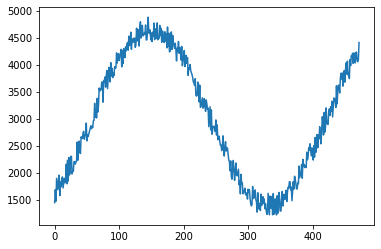

In [27]:
import matplotlib.pyplot as plt
val = list(data.values())[0]
c,v,b = val["consumption_heating"], val["consumption_electricity"], val["solar"]["save_solar"]
plt.plot(range(len(c)),c)